# Random Forest

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from prepare import train_val_test, prep_titanic, metrics, rubric

1) Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [38]:
#assigning prep_titanic to df

df = prep_titanic()

In [39]:
# splitting the titanic dataframe into training, validation, and test sets.

train, val, test = train_val_test(df, strat = 'survived')

In [40]:
#encoding the sex, class and embark town categorical columns in the train set and dropping the female_sex col.

train = pd.get_dummies(train, columns = ['sex'], drop_first = True)
train = pd.get_dummies(train, columns = ['class', 'embark_town'])
train.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,19.0,1,0,53.1000,0,True,True,False,False,False,False,True
45,0,28.0,0,0,8.0500,1,True,False,False,True,False,False,True
28,1,28.0,0,0,7.8792,1,False,False,False,True,False,True,False
633,0,28.0,0,0,0.0000,1,True,True,False,False,False,False,True
403,0,28.0,1,0,15.8500,0,True,False,False,True,False,False,True


In [41]:
#encoding the sex, class and embark town categorical columns in the val set and dropping the female_sex col.

val = pd.get_dummies(val, columns = ['sex'], drop_first = True)
val = pd.get_dummies(val, columns = ['class', 'embark_town'])
val.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
377,0,27.0,0,2,211.500,0,True,True,False,False,True,False,False
244,0,30.0,0,0,7.225,1,True,False,False,True,True,False,False
72,0,21.0,0,0,73.500,1,True,False,True,False,False,False,True
815,0,28.0,0,0,0.000,1,True,True,False,False,False,False,True
841,0,16.0,0,0,10.500,1,True,False,True,False,False,False,True


In [42]:
#making sure train and val have the same # of columns

train.shape, val.shape

((623, 13), (134, 13))

In [43]:
# creating an X & y version of train and val, where y is a series with just the target variable and X are all the features.

X_train = train.drop(columns = 'survived')
y_train = train.survived

X_val = val.drop(columns = 'survived')
y_val = val.survived

In [44]:
# creating a baseline of the most occuring number in the survived column

(y_train == 0).mean()

0.6163723916532905

baseline accuracy is 62%

In [45]:
#verifying that x and y train have the same amount of rows

X_train.shape[:1], y_train.shape[:1]

((623,), (623,))

In [46]:
#creating a model and fitting it to our train set

seed = 42

rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, random_state = seed)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [47]:
train_acc = rf.score(X_train, y_train)
train_acc

0.956661316211878

In [48]:
val_acc = rf.score(X_val, y_val)
val_acc

0.835820895522388

In [49]:
rf.feature_importances_

array([0.21785056, 0.04086637, 0.0439032 , 0.22506522, 0.02060527,
       0.29997892, 0.03316814, 0.01503671, 0.06026992, 0.01566116,
       0.0086779 , 0.01891662])

In [50]:
np.array([0.21785056, 0.04086637, 0.0439032 , 0.22506522, 0.02060527,
       0.29997892, 0.03316814, 0.01503671, 0.06026992, 0.01566116,
       0.0086779 , 0.01891662]).sum()

0.9999999900000001

In [51]:
fi = pd.DataFrame({'feature' : X_train.columns,
              'importance' : rf.feature_importances_})

fi.sort_values(by = 'importance', ascending = False)

,feature,importance
5,sex_male,0.299979
3,fare,0.225065
0,age,0.217851
8,class_Third,0.060270
2,parch,0.043903
1,sibsp,0.040866
6,class_First,0.033168
4,alone,0.020605
11,embark_town_Southampton,0.018917
9,embark_town_Cherbourg,0.015661


creating a visualization to show the train and validate accuracy as depth increases.

In [52]:
seed = 42
train_acc = []
val_acc = []
depth = []

for i in range(2, 13):

        rf = RandomForestClassifier(max_depth = i, min_samples_leaf = 1, random_state = seed)
    
        rf.fit(X_train, y_train)
    
        train_acc.append(rf.score(X_train, y_train))
    
        val_acc.append(rf.score(X_val, y_val))
    
        depth.append(i)

In [53]:
trees = pd.DataFrame({'max_depth' : depth, 'train_acc' : train_acc, 'val_acc' : val_acc})
trees

,max_depth,train_acc,val_acc
0,2,0.810594,0.820896
1,3,0.829856,0.835821
2,4,0.849117,0.828358
3,5,0.860353,0.828358
4,6,0.878010,0.835821
5,7,0.903692,0.835821
6,8,0.934189,0.843284
7,9,0.942215,0.843284
8,10,0.956661,0.835821
9,11,0.961477,0.843284


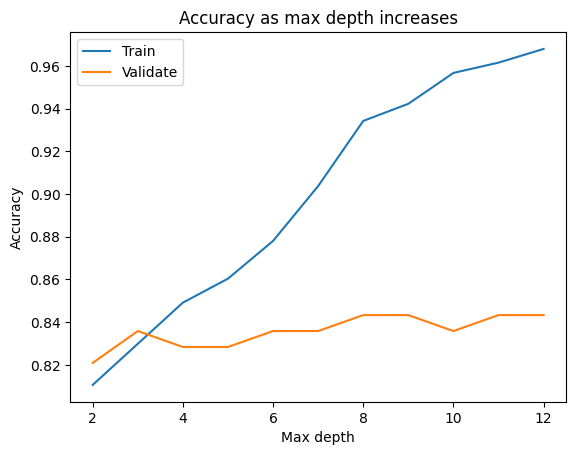

In [54]:
plt.plot(trees.max_depth, trees.train_acc, label = 'Train')
plt.plot(trees.max_depth, trees.val_acc, label = 'Validate')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.title('Accuracy as max depth increases')
plt.legend()
plt.show()

2) Evaluate your results using the model score, confusion matrix, and classification report.

### model score

In [55]:
rf.score(X_train, y_train)

0.9678972712680578

### confusion matrix

In [56]:
t_pred = rf.predict(X_train)
t_pred[:5]

array([0, 0, 1, 0, 0])

In [57]:
v_pred = rf.predict(X_val)
v_pred[:5]

array([0, 0, 0, 0, 0])

In [58]:
#creating a crosstab for the val confising matrix

pd.crosstab(y_val, v_pred)

col_0,0,1
survived,,
0,75,7
1,14,38


In [59]:
#creating a crosstab for the train confising matrix

ct = pd.crosstab(y_train, t_pred)
ct

col_0,0,1
survived,,
0,382,2
1,18,221


### classification report

In [60]:
print(classification_report(y_train, t_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       384
           1       0.99      0.92      0.96       239

    accuracy                           0.97       623
   macro avg       0.97      0.96      0.97       623
weighted avg       0.97      0.97      0.97       623



3) Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [61]:
ct

col_0,0,1
survived,,
0,382,2
1,18,221


#### accuracy

In [62]:
acc = (382 + 221) / (382 + 221 + 18 + 2)
acc

0.9678972712680578

#### true positive rate

In [63]:
tpr = 382 / (382 + 2)
tpr

0.9947916666666666

#### false positive rate

In [64]:
fpr = 18 / (18 + 221)
fpr

0.07531380753138076

#### true negative rate

In [65]:
tnr = 221 / (221 + 18)
tnr

0.9246861924686193

#### false negative rate

In [66]:
fnr = 2 / (2 + 382)
fnr

0.005208333333333333

#### precision

In [67]:
pre = 382 / (382 + 18)
pre

0.955

#### recall

In [68]:
rec = 382 / (382 + 2)
rec

0.9947916666666666

#### f1-score

In [69]:
f1 = 2 * (pre * rec) / (pre + rec)
f1

0.9744897959183673

#### support

In [70]:
sup = 382 + 2
sup

384

### validate accuracy score

In [71]:
rf.score(X_val, y_val)

0.8432835820895522

4) Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [77]:
seed = 42
train_acc = []
val_acc = []
depth = []
min_samples_leaf = []

for i in (reversed(range(2, 5))):

    for n in range(2, 5):

        rf = RandomForestClassifier(max_depth = i, min_samples_leaf = n, random_state = seed)
    
        rf.fit(X_train, y_train)
    
        train_acc.append(rf.score(X_train, y_train))
    
        val_acc.append(rf.score(X_val, y_val))
    
        depth.append(i)

        min_samples_leaf.append(n)

In [80]:
trees = pd.DataFrame({'max_depth' : depth,  'min_sample_leaf' : min_samples_leaf, 'train_acc' : train_acc, 'val_acc' : val_acc})
trees

,max_depth,min_sample_leaf,train_acc,val_acc
0,4,2,0.845907,0.828358
1,4,3,0.842697,0.820896
2,4,4,0.845907,0.843284
3,3,2,0.833066,0.835821
4,3,3,0.833066,0.835821
5,3,4,0.831461,0.835821
6,2,2,0.810594,0.820896
7,2,3,0.810594,0.820896
8,2,4,0.808989,0.820896


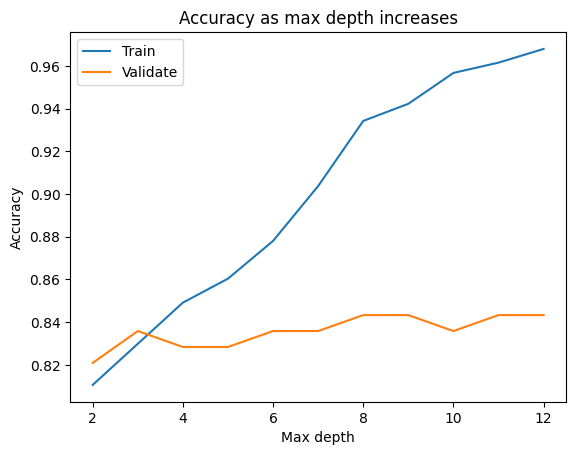

In [79]:
plt.plot(trees.max_depth, trees.train_acc, label = 'Train')
plt.plot(trees.max_depth, trees.val_acc, label = 'Validate')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.title('Accuracy as max depth increases')
plt.legend()
plt.show()

### max_depth = 8 and min_samples_leaf = 2

In [ ]:
#increasing min_samples_leaf to 2 and max depth to 8

seed = 42

rf = RandomForestClassifier(max_depth = 8, min_samples_leaf = 2, random_state = seed)

rf.fit(X_train, y_train)

In [ ]:
t_acc = rf.score(X_train, y_train)
t_acc

In [ ]:
v_acc = rf.score(X_val, y_val)
v_acc

In [ ]:
rf.feature_importances_

In [ ]:
np.array([0.15787344, 0.04309999, 0.04410571, 0.17592057, 0.0229972 ,
       0.37413902, 0.04206108, 0.01594644, 0.07999934, 0.01521036,
       0.00862079, 0.02002604]).sum()

In [ ]:
fi = pd.DataFrame({'feature' : X_train.columns,
              'importance' : rf.feature_importances_})

fi.sort_values(by = 'importance', ascending = False)

In [ ]:
seed = 42
t_acc = []
v_acc = []
depth = []

for i in range(2, 11):

    rf = RandomForestClassifier(max_depth = i, min_samples_leaf = 2, random_state = seed)

    rf.fit(X_train, y_train)

    t_acc.append(rf.score(X_train, y_train))

    v_acc.append(rf.score(X_val, y_val))

    depth.append(i)

In [ ]:
trees = pd.DataFrame({'max_depth' : depth, 'train_acc' : t_acc, 'val_acc' : v_acc})
trees

In [ ]:
plt.plot(trees.max_depth, trees.train_acc, label = 'Train')
plt.plot(trees.max_depth, trees.val_acc, label = 'Validate')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.title('Accuracy as max depth increases')
plt.legend()
plt.show()

### model score

In [ ]:
#train model score

rf.score(X_train, y_train)

### confusion matrix

In [ ]:
t_pred = rf.predict(X_train)
t_pred[:5]

In [ ]:
v_pred = rf.predict(X_val)
v_pred[:5]

In [ ]:
pd.crosstab(y_train, t_pred)

In [ ]:
pd.crosstab(y_val, v_pred)

### classification report

In [ ]:
#train classification report

print(classification_report(y_train, t_pred))

In [ ]:
#val classification report

print(classification_report(y_val, v_pred))

In [ ]:
pd.crosstab(y_train, t_pred)

#### accuracy

In [ ]:
acc2 = (369 + 201) / (369 + 201 + 38 + 15)
acc2

#### true positive rate

In [ ]:
tpr2 = 369 / (369 + 15)
tpr2

#### false positive rate

In [ ]:
fpr2 = 38 / (38 + 201)
fpr2

#### true negative rate

In [ ]:
tnr2 = 201 / (201 + 38)
tnr2

#### false negative rate

In [ ]:
fnr2 = 15 / (15 + 369)
fnr2

#### precision

In [ ]:
pre2 = 369 / (369 + 38)
pre2

#### recall

In [ ]:
rec2 = 369 / (369 + 15)
rec2

In [ ]:
f1_2 = 2 * (pre * rec) / (pre + rec)
f1_2

#### support

In [ ]:
sup2 = 369 + 15
sup2

### validate accuracy

In [ ]:
#val model score

rf.score(X_val, y_val)

5) What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [ ]:
data = {
    '': ['accuracy', 'tpr', 'fpr', 'tnr', 'fnr', 'pre', 'rec', 'f1'] ,
    '1st_model': [acc, tpr, fpr, tnr, fnr, pre, rec, f1],
    '2nd_model': [acc2, tpr2, fpr2, tnr2, fnr2, pre2, rec2, f1_2], 
}

model = round(pd.DataFrame(data),2)
model.set_index('', inplace=True)
model['Difference'] = model['1st_model'] - model['2nd_model']

In [ ]:
model